In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Auto.csv")
df = df.drop(df[df.values == '?'].index)
df = df.astype({'origin': 'category', 'horsepower': 'int32', 'name': 'string'})
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
df.dtypes

mpg              float64
cylinders          int64
displacement     float64
horsepower         int32
weight             int64
acceleration     float64
year               int64
origin          category
name              string
dtype: object

In [4]:
def split_train_validate_test(df, ratios = [.6, .2]):
    n = len(df)
    train_ratio, validate_ratio = ratios
    return np.split(df.sample(frac=1), [int(train_ratio*n), int((train_ratio+validate_ratio)*n)])

In [5]:
train, validate, test = split_train_validate_test(df, [.6, .2])

In [6]:
n = len(df)
(len(train) / n, len(validate) / n, len(test) / n)

(0.5994897959183674, 0.1989795918367347, 0.20153061224489796)

In [7]:
results = smf.ols('mpg ~ horsepower', data=df).fit()

In [8]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Wed, 18 Nov 2020   Prob (F-statistic):           7.03e-81
Time:                        13:33:50   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fef00cce5b0>,
      dtype=object)

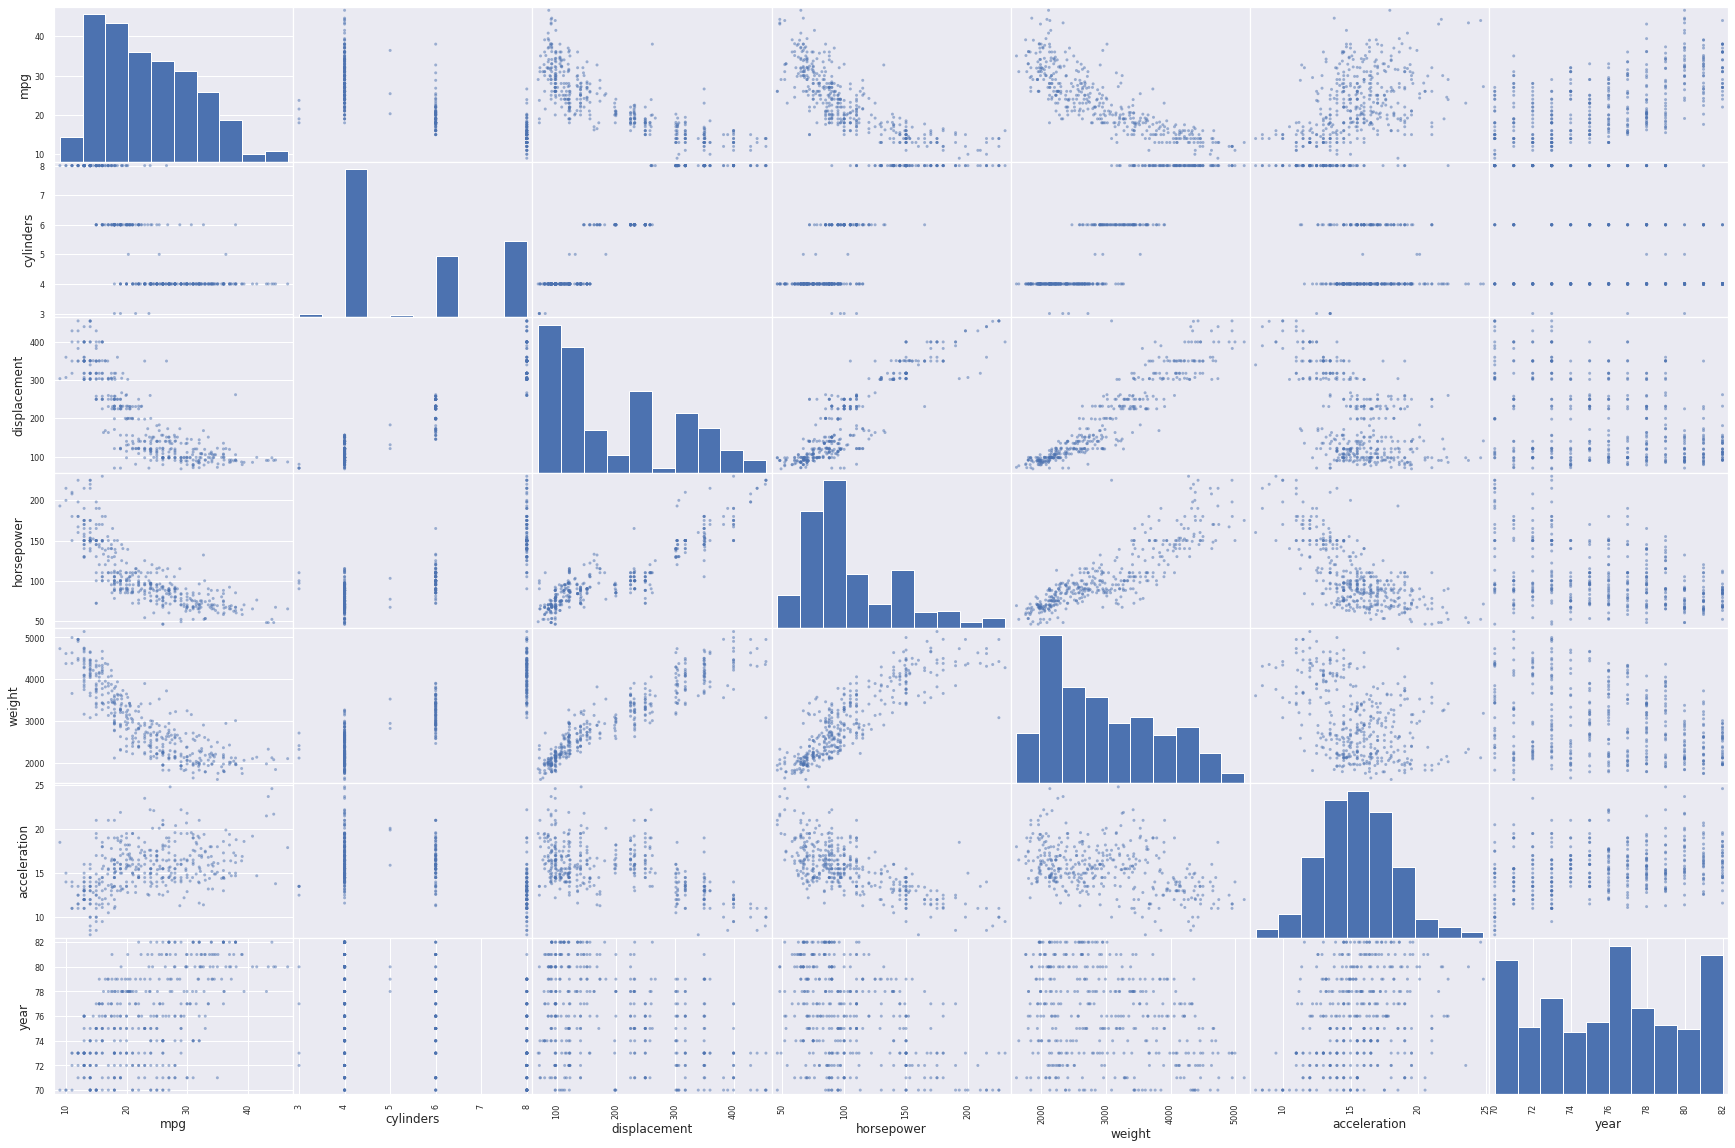

In [9]:
pd.plotting.scatter_matrix(df, figsize=(30, 20))

In [10]:
correlation = df.corr().abs(); correlation

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,0.777618,0.805127,0.778427,0.832244,0.423329,0.580541
cylinders,0.777618,1.000000,0.950823,0.842983,0.897527,0.504683,0.345647
displacement,0.805127,0.950823,1.000000,0.897257,0.932994,0.543800,0.369855
horsepower,0.778427,0.842983,0.897257,1.000000,0.864538,0.689196,0.416361
weight,0.832244,0.897527,0.932994,0.864538,1.000000,0.416839,0.309120
acceleration,0.423329,0.504683,0.543800,0.689196,0.416839,1.000000,0.290316
year,0.580541,0.345647,0.369855,0.416361,0.309120,0.290316,1.000000


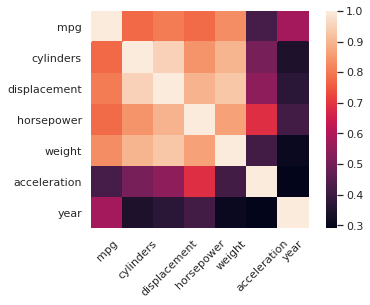

In [11]:
, ax = plt.subplots(figsize=(40, 40))
sns.heatmap(correlation, vmax=1, square=True)
plt.xticks(rotation=45)
plt.yticks(rotation=0);

## c)

In [12]:
formula = 'mpg ~ cylinders + displacement + horsepower + weight + acceleration + year + C(origin)'

model = smf.ols(formula, df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.79e-139
Time:                        13:33:55   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -17.9546      4.677     -3.839      0.000     -27.150      -8.759
C(origin)[T.2]     2.6300      0.566      4.643      0.000       1.516       3.744
C(origin)[T.3]     2.8532      0.553      5.162      0.000       1.766       3.940
cylinders         -0.4897      0.321     -1.524      0.128      -1.121       0.142
displacement       0.0240      0.008      3.133      0.002       0.009       0.039
horsepower        -0.0182      0.014     -1.326      0.185      -0.045       0.009
weight            -0.0067      0.001    -10.243      0.000      -0.008      -0.005
acceleration       0.0791      0.098      0.805      0.421      -0.114       0.272
year               0.7770      0.052     15.005      0.000       0.675       0.879
==============================================================================
Omnibus:                       23.395   Durbin-Watson:                   1.291
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.452
Skew:                           0.444   Prob(JB):                     3.30e-08
Kurtosis:                       4.150   Cond. No.                     8.70e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
model.pvalues[model.pvalues < 0.05].sort_values().round(2)

year              0.0
weight            0.0
C(origin)[T.3]    0.0
C(origin)[T.2]    0.0
Intercept         0.0
displacement      0.0
dtype: float64

In [14]:
formula = 'mpg ~ displacement + weight + year + C(origin)'

model_short = smf.ols(formula, df).fit()
model_short.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     353.2
Date:                Wed, 18 Nov 2020   Prob (F-statistic):          1.40e-141
Time:                        13:33:55   Log-Likelihood:                -1024.4
No. Observations:                 392   AIC:                             2061.
Df Residuals:                     386   BIC:                             2085.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -19.5949      4.064     -4.822      0.000     -27.585     -11.605
C(origin)[T.2]     2.3830      0.561      4.251      0.000       1.281       3.485
C(origin)[T.3]     2.4381      0.531      4.592      0.000       1.394       3.482
displacement       0.0093      0.005      1.864      0.063      -0.001       0.019
weight            -0.0068      0.001    -12.099      0.000      -0.008      -0.006
year               0.7980      0.051     15.705      0.000       0.698       0.898
==============================================================================
Omnibus:                       28.030   Durbin-Watson:                   1.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.724
Skew:                           0.457   Prob(JB):                     2.63e-11
Kurtosis:                       4.466   Cond. No.                     7.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
model_short.pvalues[model.pvalues < 0.05].sort_values().round(2)

year              0.00
weight            0.00
Intercept         0.00
C(origin)[T.3]    0.00
C(origin)[T.2]    0.00
displacement      0.06
dtype: float64